# Data preparation and customer analytics

In [5]:
# Load required packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [6]:
# Load data
transactions = pd.read_excel('QVI_transaction_data.xlsx')
customers = pd.read_csv('QVI_purchase_behaviour.csv')

## Examining transactions data

In [7]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
transactions.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [9]:
transactions.describe()
# We can see that the max value for PROD_QTY is 200, which is large.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
transactions.describe(include='object')

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


---

### Checking outliers

In [11]:
transactions.reset_index(drop=True, inplace=True)
print(transactions.PROD_QTY.unique())
# there are one unique value of 200, which is likely to be outliers
transactions[transactions.PROD_QTY == 200]

[  2   3   5   1   4 200]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [12]:
# checking the customer that made these transactions
transactions[transactions.LYLTY_CARD_NBR == 226000]
# it seems that the customer only made these two transactions, we can remove this customer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [13]:
# remove the outliers
transactions = transactions[transactions.PROD_QTY != 200]
# or transactions = transactions[transactions.LYLTY_CARD_NBR != 226000]
transactions.reset_index(drop=True, inplace=True)
transactions.PROD_QTY.unique()

array([2, 3, 5, 1, 4], dtype=int64)

---

### Converting datetime

In [14]:
# Convert DATE column to datetime
transactions.DATE = pd.to_datetime(transactions.DATE, unit='D', origin=datetime.date(1899, 12, 30))

---

### Examining false entries

In [15]:
# create a list of individual words in PROD_NAME
words = []
for i in transactions.PROD_NAME:
    words.append(i.split())
# remove all words with digits and special characters such as '&' and '/'
for i in range(len(words)):
    words[i] = [word for word in words[i] if word.isalpha()]
# flatten the list
words = [word for sublist in words for word in sublist]
pd.Series(words).unique()

array(['Natural', 'Chip', 'Compny', 'CCs', 'Nacho', 'Cheese', 'Smiths',
       'Crinkle', 'Cut', 'Chips', 'Chicken', 'Thinly', 'Kettle',
       'Tortilla', 'Chili', 'Old', 'El', 'Paso', 'Salsa', 'Dip', 'Tomato',
       'Mild', 'Salt', 'Vinegar', 'Grain', 'Waves', 'Sweet', 'Chilli',
       'Doritos', 'Corn', 'Mexican', 'Jalapeno', 'Sour', 'Sensations',
       'Siracha', 'Lime', 'Twisties', 'WW', 'Thins', 'Tangy', 'Original',
       'Burger', 'Rings', 'NCC', 'Cream', 'Garden', 'Chives', 'Southern',
       'Cheezels', 'Box', 'Infzns', 'Crn', 'Crnchers', 'Gcamole', 'Sea',
       'And', 'Red', 'Rock', 'Deli', 'Thai', 'Pringles', 'Sthrn',
       'FriedChicken', 'BBQ', 'SR', 'Mzzrlla', 'Originl', 'saltd', 'Sp',
       'Truffle', 'Swt', 'Mexicana', 'French', 'OnionDip', 'ChipCo',
       'Hony', 'Soy', 'Dorito', 'Chp', 'Supreme', 'Roast', 'Mozzarella',
       'Basil', 'Pesto', 'Infuzions', 'SweetChili', 'PotatoMix',
       'Camembert', 'Fig', 'Smith', 'Mac', 'N', 'Honey',
       'Seasonedchicke

In [16]:
pd.Series(words).value_counts().head(20)

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22061
Original    21560
Cut         20754
Chip        18645
Salsa       18094
Chicken     15407
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
Vinegar     12402
Chilli      12389
Name: count, dtype: int64

As we can see from the previous two codel cells, there are salsa products in the dataset, which is not the item of interest.

In [17]:
# remove salsa products
transactions = transactions[~transactions.PROD_NAME.str.contains('Salsa')]
# check if salsa products are removed
transactions[transactions.PROD_NAME.str.contains('Salsa')].shape
# salsa products are removed since the shape is (0, 8) which means there are 0 rows and 8 columns

(0, 8)

---

### Missing dates

In [18]:
transactions.DATE.value_counts().sort_index()
# the data is from 2018-07-01 to 2019-06-30 with 364 days in total, indicates that there is one day missing

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: count, Length: 364, dtype: int64

In [19]:
# find the missing date
pd.date_range(start='2018-07-01', end='2019-06-30').difference(transactions.DATE)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [20]:
# double-check by zooming in on the date range from 2018-12-20 to 2019-01-01
transactions.DATE[(transactions.DATE >= '2018-12-20') & (transactions.DATE <= '2019-01-01')].value_counts().sort_index()
# there is indeed one day missing: 2018-12-25

DATE
2018-12-20    808
2018-12-21    781
2018-12-22    840
2018-12-23    853
2018-12-24    865
2018-12-26    700
2018-12-27    690
2018-12-28    669
2018-12-29    666
2018-12-30    686
2018-12-31    650
2019-01-01    634
Name: count, dtype: int64

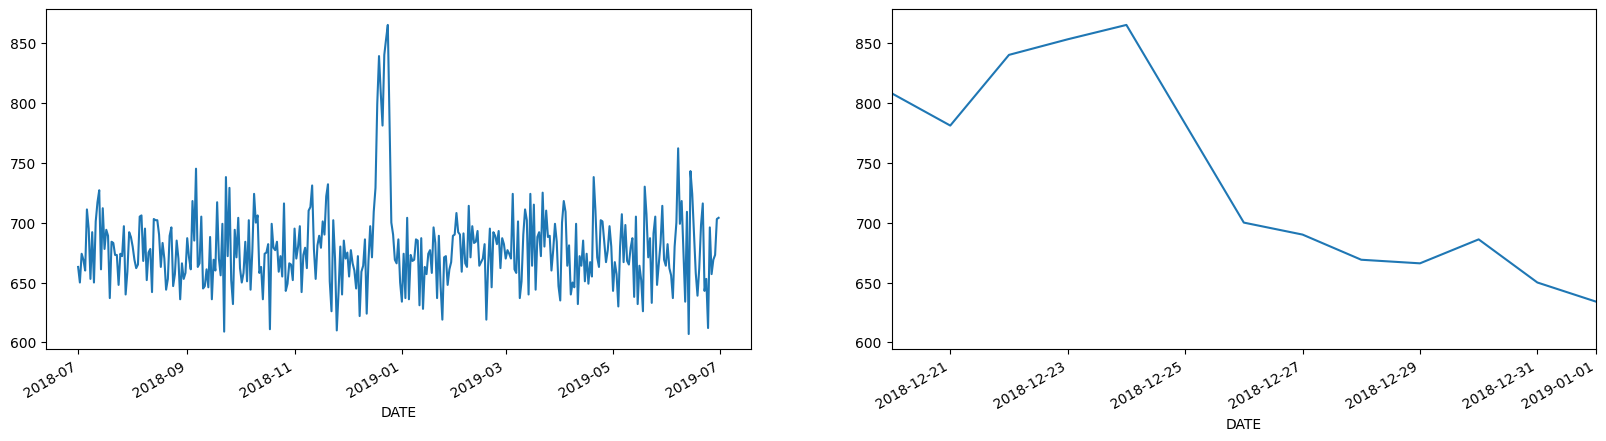

In [21]:
# create a plot containing two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# we can also check the missing date by creating a chart of the number of transactions over time
transactions.DATE.value_counts().sort_index().plot(ax=ax[0])

# zoom in on the missing date
transactions.DATE.value_counts().sort_index().plot(ax=ax[1])
ax[1].set_xlim(pd.Timestamp('2018-12-20'), pd.Timestamp('2019-01-01'))

plt.show()

Looking at the visualisations, we can see a decrease from 2018-12-24 to 2018-12-26 without any break in the line lead to 2018-12-26, indicates that there are no sale made on 2018-12-25, the Christmas day. The descriptive statistics created before this also confirm this statement.

---

### Creating new columns

In [22]:
# create a column of pack size for each product
transactions['PACK_SIZE'] = transactions.PROD_NAME.str.extract('(\d+)')
transactions.PACK_SIZE = transactions.PACK_SIZE.astype('int64')

In [23]:
# remove the last 4 characters from PROD_NAME
transactions.PROD_NAME = transactions.PROD_NAME.str[:-4]
transactions.PROD_NAME = transactions.PROD_NAME.str.strip()
transactions.PROD_NAME

0          Natural Chip        Compny SeaSalt
1                            CCs Nacho Cheese
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
264829     Kettle Sweet Chilli And Sour Cream
264830               Tostitos Splash Of  Lime
264831                       Doritos Mexicana
264832     Doritos Corn Chip Mexican Jalapeno
264833               Tostitos Splash Of  Lime
Name: PROD_NAME, Length: 246740, dtype: object

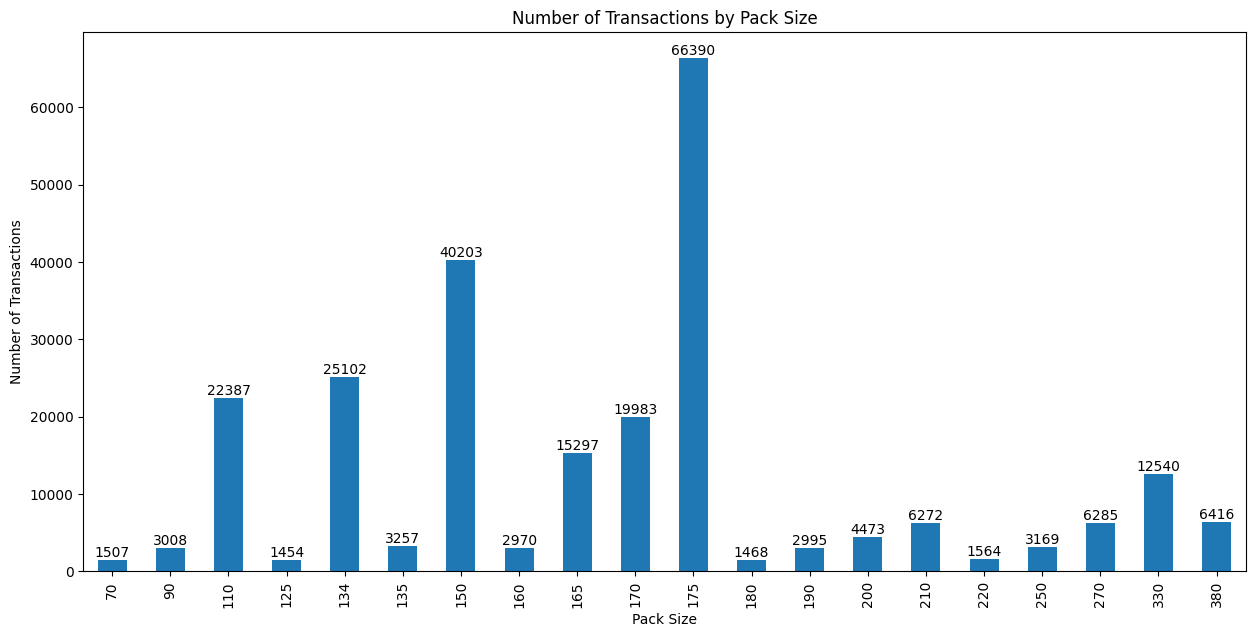

In [24]:
# create a chart showing the number of transactions by pack size.
ax = transactions.PACK_SIZE.value_counts().sort_index().plot(kind='bar', figsize=(15, 7))
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Pack Size')
ax.bar_label(ax.containers[0], label_type="edge")
plt.show()

Based on the chart, we can see that there are 4 most popular pack sizes. In order, 175g, 150g, 134g, 110g

In [25]:
transactions.PROD_NAME

0          Natural Chip        Compny SeaSalt
1                            CCs Nacho Cheese
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
264829     Kettle Sweet Chilli And Sour Cream
264830               Tostitos Splash Of  Lime
264831                       Doritos Mexicana
264832     Doritos Corn Chip Mexican Jalapeno
264833               Tostitos Splash Of  Lime
Name: PROD_NAME, Length: 246740, dtype: object

In [26]:
# create a column of brand name for each product
dict = {'RRD': 'Red Rock Deli', 'WW': 'Woolworths', 'NCC': 'Natural Chip Co', r'\bSmith\b': 'Smiths', 'Infzns': 'Infuzions', 'Snbts': 'Sunbites',
        'GrnWves':'Grain Waves'}
transactions.PROD_NAME.replace(dict, regex=True, inplace=True)
transactions['BRAND'] = transactions.PROD_NAME.str.split().str[0]
transactions.BRAND.value_counts()

BRAND
Kettle        41288
Smiths        30353
Pringles      25102
Doritos       22041
Red           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Grain          7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Dorito         3183
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: count, dtype: int64

In [27]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,Kettle
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,175,Tostitos
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,170,Doritos
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,150,Doritos


## Examining customers data

In [28]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [29]:
customers.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
customers.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [31]:
customers.LYLTY_CARD_NBR.value_counts()
# There are 72637 unique customers, with no duplicates

LYLTY_CARD_NBR
1000       1
181211     1
181217     1
181216     1
181215     1
          ..
88126      1
88127      1
88128      1
88129      1
2373711    1
Name: count, Length: 72637, dtype: int64

In [32]:
customers.LIFESTAGE.value_counts()
# There are 7 unique lifestages

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [33]:
customers.PREMIUM_CUSTOMER.value_counts()
# There are 3 unique premium customers

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

We can see that there are 3 unique premium customers and 7 unique lifestages, which means there are 21 unique customer segments

In [34]:
# merge the two datasets, keeping all the rows of transactions on the left and find rows with matching values from customers on the right
data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [35]:
# Check on any missing values
data.isnull().sum()
# There are 0 missing values

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [36]:
# Export the data to a csv file
data.to_csv('data.csv', index=False)

---

# Data Analysis

## Who spends the most on chips (total sales)? Their lifestages, and general purchasing behaviour?

In [37]:
sales_by_cus = data.groupby('LYLTY_CARD_NBR')[['TOT_SALES','LIFESTAGE', 'PREMIUM_CUSTOMER']].agg(
    {'TOT_SALES': 'sum', 'LIFESTAGE': 'first', 'PREMIUM_CUSTOMER': 'first'}
).sort_values(by='TOT_SALES', ascending=False)

sale_summary_segment = pd.merge(
    sales_by_cus[['PREMIUM_CUSTOMER','LIFESTAGE']].value_counts().to_frame(),
    sales_by_cus.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum().sort_values(ascending=False).to_frame(),
    left_index=True, right_index=True
)
sale_summary_segment.rename(columns={'count': 'Number of Customer', 'TOT_SALES': 'Total Sales'}, inplace=True)
sale_summary_segment['Average Sales per Customer'] = sale_summary_segment['Total Sales'] / sale_summary_segment['Number of Customer']
# To change the sort column, we can replace the by argument with one of the three column names
sale_summary_segment.sort_values(by='Total Sales', ascending=False)

Number of Customer  Total Sales  \
PREMIUM_CUSTOMER LIFESTAGE                                                 
Budget           OLDER FAMILIES                        4611    156863.75   
Mainstream       YOUNG SINGLES/COUPLES                 7917    147582.20   
                 RETIREES                              6358    145168.95   
Budget           YOUNG FAMILIES                        3953    129717.95   
                 OLDER SINGLES/COUPLES                 4849    127833.60   
Mainstream       OLDER SINGLES/COUPLES                 4858    124648.50   
Premium          OLDER SINGLES/COUPLES                 4682    123537.55   
Budget           RETIREES                              4385    105916.30   
Mainstream       OLDER FAMILIES                        2788     96413.55   
Premium          RETIREES                              3812     91296.65   
Mainstream       YOUNG FAMILIES                        2685     86338.25   
                 MIDAGE SINGLES/COUPLES                3298     84734.25   
Premium          YOUNG FAMILIES                        2398     78571.70   
                 OLDER FAMILIES                        2231     75242.60   
Budget           YOUNG SINGLES/COUPLES                 3647     57122.10   
Premium          MIDAGE SINGLES/COUPLES                2369     54443.85   
                 YOUNG SINGLES/COUPLES                 2480     39052.30   
Budget           MIDAGE SINGLES/COUPLES                1474     33345.70   
                 NEW FAMILIES                          1087     20607.45   
Mainstream       NEW FAMILIES                           830     15979.70   
Premium          NEW FAMILIES                           575     10760.80   

                                         Average Sales per Customer  
PREMIUM_CUSTOMER LIFESTAGE                                           
Budget           OLDER FAMILIES                           34.019464  
Mainstream       YOUNG SINGLES/COUPLES                    18.641177  
                 RETIREES                                 22.832487  
Budget           YOUNG FAMILIES                           32.815065  
                 OLDER SINGLES/COUPLES                    26.362879  
Mainstream       OLDER SINGLES/COUPLES                    25.658399  
Premium          OLDER SINGLES/COUPLES                    26.385636  
Budget           RETIREES                                 24.154230  
Mainstream       OLDER FAMILIES                           34.581618  
Premium          RETIREES                                 23.949803  
Mainstream       YOUNG FAMILIES                           32.155773  
                 MIDAGE SINGLES/COUPLES                   25.692617  
Premium          YOUNG FAMILIES                           32.765513  
                 OLDER FAMILIES                           33.725952  
Budget           YOUNG SINGLES/COUPLES                    15.662764  
Premium          MIDAGE SINGLES/COUPLES                   22.981786  
                 YOUNG SINGLES/COUPLES                    15.746895  
Budget           MIDAGE SINGLES/COUPLES                   22.622592  
                 NEW FAMILIES                             18.958096  
Mainstream       NEW FAMILIES                             19.252651  
Premium          NEW FAMILIES                             18.714435

Some of the findings are:
- The main customer segment is from Mainstream - Young singles/couples, Mainstream - Retirees, Budget - Older families, and all of the Older singles/couples. Same story for the total sales
- But with average Sales per Customer, the older and young families dominate the table, indicating that in the customer segment, in general, each customer willing to but more chips and make higher sale.

In [38]:
# since older families and young families are not so different in Average Sales per Customer, the difference is checked by t-test
import scipy.stats as stats
stats.ttest_ind(data[data['LIFESTAGE'] == 'OLDER FAMILIES']['TOT_SALES'],
                data[data['LIFESTAGE'] == 'YOUNG FAMILIES']['TOT_SALES'])

TtestResult(statistic=-0.05658760308385794, pvalue=0.9548738420247515, df=85650.0)

There aren't any statistically significant difference in the Total Sales between Older and Young Families.

In [39]:
# create a dataframe of total sales larger than 100 dollars
sales_larger_than_100 = sales_by_cus[sales_by_cus.TOT_SALES > 100]
sales_larger_than_100

,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
LYLTY_CARD_NBR,,,
230078,138.6,OLDER FAMILIES,Budget
58361,124.8,YOUNG FAMILIES,Budget
63197,122.6,OLDER FAMILIES,Budget
162039,121.6,OLDER FAMILIES,Mainstream
179228,120.8,YOUNG FAMILIES,Budget
...,...,...,...
48155,100.7,OLDER SINGLES/COUPLES,Budget
209155,100.6,YOUNG FAMILIES,Budget
67109,100.4,RETIREES,Premium


Based on the table above, we can see that the highest customer spent 138.6 dollars in total and the customer with loyalty number 230078 is from the 'OLDER FAMILIES' lifestage and belongs to the 'Budget' customer segment.

In [40]:
sales_larger_than_100[['PREMIUM_CUSTOMER','LIFESTAGE']].value_counts().sort_index()

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            11
                  OLDER SINGLES/COUPLES      5
                  RETIREES                   3
                  YOUNG FAMILIES            15
                  YOUNG SINGLES/COUPLES      2
Mainstream        MIDAGE SINGLES/COUPLES     1
                  OLDER FAMILIES             8
                  OLDER SINGLES/COUPLES      2
                  YOUNG FAMILIES             2
                  YOUNG SINGLES/COUPLES      4
Premium           MIDAGE SINGLES/COUPLES     3
                  OLDER FAMILIES             3
                  OLDER SINGLES/COUPLES      6
                  RETIREES                   1
                  YOUNG FAMILIES             4
                  YOUNG SINGLES/COUPLES      2
Name: count, dtype: int64

In the customer segment where they have made purchases that up to 100 dollars, the two highest customer segment are Budget - Older families and Budget - Young families.

---

## How many transactions are in each segment?

In [41]:
cus_by_seg = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['LYLTY_CARD_NBR'].count()
# calculating the total of customers of each premium customer segment
cus_by_seg.groupby('PREMIUM_CUSTOMER').sum()

PREMIUM_CUSTOMER
Budget        86762
Mainstream    95043
Premium       64935
Name: LYLTY_CARD_NBR, dtype: int64

In [42]:
cus_by_seg.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            21514
Mainstream        RETIREES                  19970
                  YOUNG SINGLES/COUPLES     19544
Budget            YOUNG FAMILIES            17763
                  OLDER SINGLES/COUPLES     17172
Mainstream        OLDER SINGLES/COUPLES     17061
Premium           OLDER SINGLES/COUPLES     16560
Budget            RETIREES                  14225
Mainstream        OLDER FAMILIES            13241
Premium           RETIREES                  12236
Mainstream        YOUNG FAMILIES            11947
                  MIDAGE SINGLES/COUPLES    11095
Premium           YOUNG FAMILIES            10784
                  OLDER FAMILIES            10403
Budget            YOUNG SINGLES/COUPLES      8573
Premium           MIDAGE SINGLES/COUPLES     7612
                  YOUNG SINGLES/COUPLES      5852
Budget            MIDAGE SINGLES/COUPLES     4691
                  NEW FAMILIES               2824
Mainstrea

Based on the above descriptive statistics, some findings are:
- The top 3 segments are Budget - Older Families, Mainstream - Retirees, and Mainstream - Young Singles/Couples
- The bottom 3 segments are all NEW FAMILIES

---

## How many chips are bought per customer by segment?

In [43]:
chip_by_seg = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].sum()
# calculating the total of chips of each premium customer segment
chip_by_seg.groupby('PREMIUM_CUSTOMER').sum()

PREMIUM_CUSTOMER
Budget        165774
Mainstream    180780
Premium       123845
Name: PROD_QTY, dtype: int64

In [44]:
chip_by_seg.sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            41853
Mainstream        RETIREES                  37677
                  YOUNG SINGLES/COUPLES     36225
Budget            YOUNG FAMILIES            34482
                  OLDER SINGLES/COUPLES     32883
Mainstream        OLDER SINGLES/COUPLES     32607
Premium           OLDER SINGLES/COUPLES     31695
Budget            RETIREES                  26932
Mainstream        OLDER FAMILIES            25804
Premium           RETIREES                  23266
Mainstream        YOUNG FAMILIES            23194
                  MIDAGE SINGLES/COUPLES    21213
Premium           YOUNG FAMILIES            20901
                  OLDER FAMILIES            20239
Budget            YOUNG SINGLES/COUPLES     15500
Premium           MIDAGE SINGLES/COUPLES    14400
                  YOUNG SINGLES/COUPLES     10575
Budget            MIDAGE SINGLES/COUPLES     8883
                  NEW FAMILIES               5241
Mainstrea

The same top 3 and bottom 3 statements are held for the number of chips as well.

---

## What's the average chip price by customer segment?

In [45]:
avg_chip_by_seg = data.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].mean()
avg_chip_by_seg

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            MIDAGE SINGLES/COUPLES    7.108442
                  NEW FAMILIES              7.297256
                  OLDER FAMILIES            7.291241
                  OLDER SINGLES/COUPLES     7.444305
                  RETIREES                  7.445786
                  YOUNG FAMILIES            7.302705
                  YOUNG SINGLES/COUPLES     6.663023
Mainstream        MIDAGE SINGLES/COUPLES    7.637156
                  NEW FAMILIES              7.313364
                  OLDER FAMILIES            7.281440
                  OLDER SINGLES/COUPLES     7.306049
                  RETIREES                  7.269352
                  YOUNG FAMILIES            7.226772
                  YOUNG SINGLES/COUPLES     7.551279
Premium           MIDAGE SINGLES/COUPLES    7.152371
                  NEW FAMILIES              7.231720
                  OLDER FAMILIES            7.232779
                  OLDER SINGLES/COUPLES     7.459997
     

Based on the descriptive statistics above:
- The range are around 6.66 to 7.63 dollars per segment.
- Overall, the average of chip sales in each segment is similar.

---

## The customer's total spend over the period

In [46]:
# create a dataframe of total transactions and total sales by date
sales_by_date = data.groupby('DATE')[['TOT_SALES','TXN_ID']].agg({'TOT_SALES': 'sum', 'TXN_ID': 'count'})
# create a column of average sales by date
sales_by_date['AVG_SALES'] = sales_by_date.TOT_SALES / sales_by_date.TXN_ID
# include sum for all columns
sales_by_date.loc['Total'] = sales_by_date.sum(axis=0)
sales_by_date

,TOT_SALES,TXN_ID,AVG_SALES
DATE,,,
2018-07-01 00:00:00,4920.1,663.0,7.420965
2018-07-02 00:00:00,4877.0,650.0,7.503077
2018-07-03 00:00:00,4954.7,674.0,7.351187
2018-07-04 00:00:00,4968.1,669.0,7.426158
2018-07-05 00:00:00,4682.0,660.0,7.093939
...,...,...,...
2019-06-27 00:00:00,4941.3,669.0,7.386099
2019-06-28 00:00:00,4876.6,673.0,7.246062
2019-06-29 00:00:00,5177.6,703.0,7.365007


In [47]:
sales_by_date.describe()

,TOT_SALES,TXN_ID,AVG_SALES
count,3.650000e+02,365.000000,365.000000
mean,9.891385e+03,1352.000000,14.592458
std,9.422825e+04,12879.525137,139.011594
min,3.705700e+03,607.000000,5.707163
25%,4.832300e+03,658.000000,7.302914
50%,4.968100e+03,674.000000,7.371231
75%,5.108400e+03,695.000000,7.425575
max,1.805178e+06,246740.000000,2663.123602


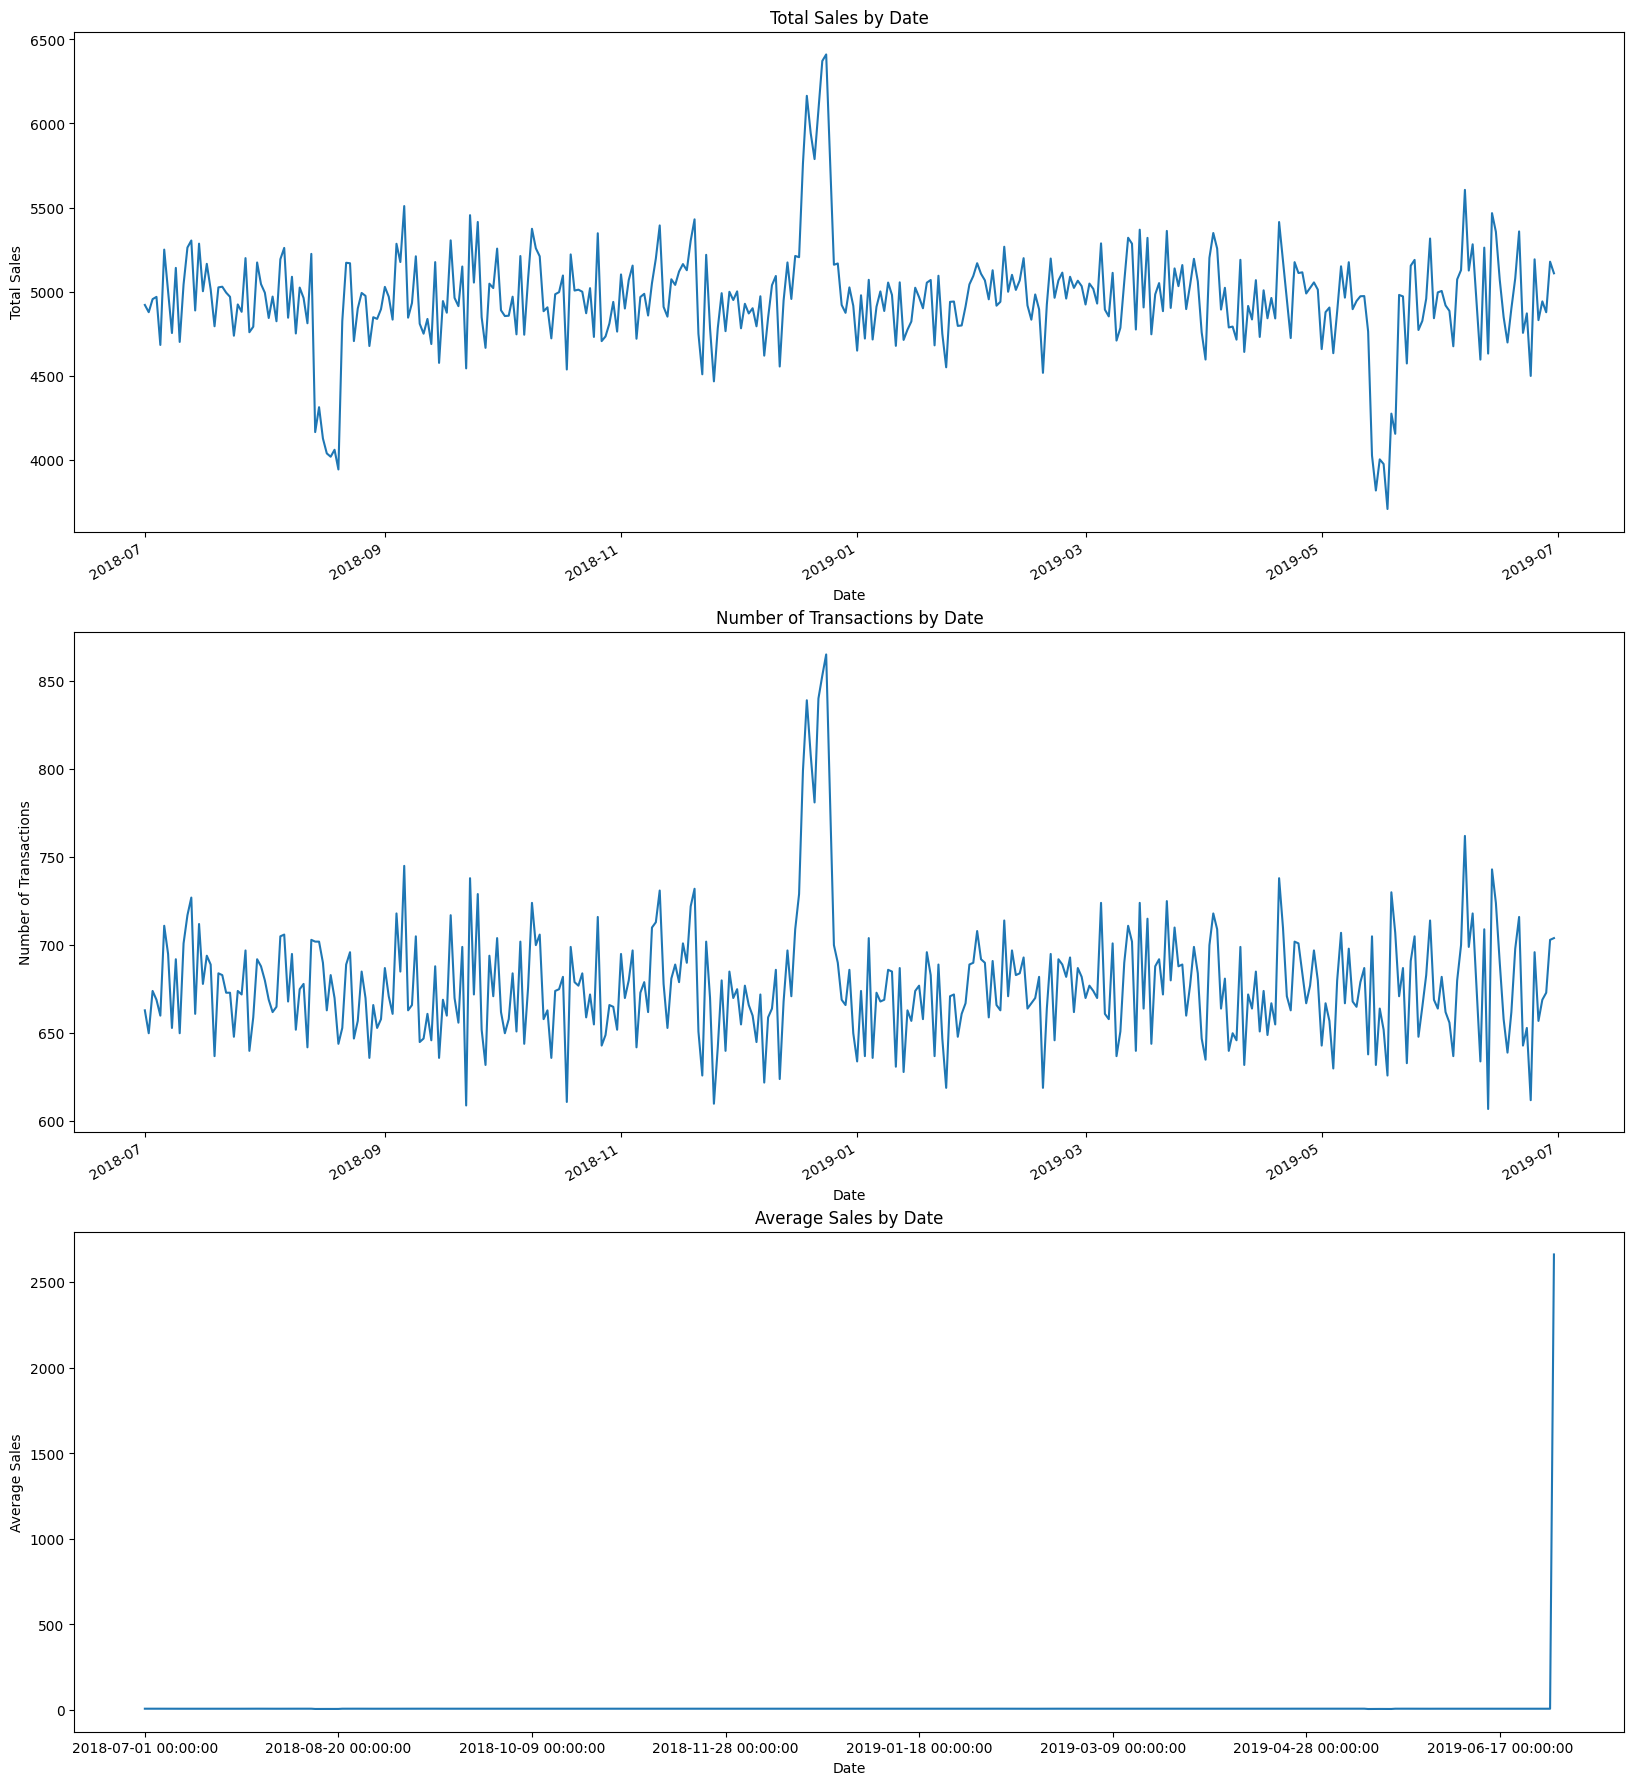

In [48]:
fig, ax = plt.subplots(3,1,figsize=(20, 25))

# create a plot depicting the total spending of customers over time
data.groupby('DATE')['TOT_SALES'].sum().plot(ax=ax[0], xlabel='Date', ylabel='Total Sales', title='Total Sales by Date')

# create a plot depicting the number of transactions over time
data.DATE.value_counts().sort_index().plot(ax=ax[1], xlabel='Date', ylabel='Number of Transactions', title='Number of Transactions by Date')

# create a plot depicting the average spending of customers over time
sales_by_date.AVG_SALES.plot(ax=ax[2], xlabel='Date', ylabel='Average Sales', title='Average Sales by Date')

plt.show()

Looking at these three plots, some of the findings are:
- In total, the revenue made for selling chips is about 1.8 millions, with about 4959 ± 310 are spent by all customers in one day.
- Each customer usually spend in average 7.1 - 7.6 dollars for chips.
- There is a high amount of transactions in the month December of 2018.
- There are two low selling prices in August 2018 and May 2019 despite the somewhat same amount of transactions.

---

# Deep Dive

    Deep diving into Mainstream - Young Singles/Couples customer segment for insights

In [49]:
# create a dataframe of only Mainstream - Young Singles/Couples customer segment
data_MS_YSC = data[(data['PREMIUM_CUSTOMER'] == 'Mainstream') & (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
data_MS_YSC

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream
221346,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream
221347,2018-08-14,1,1291,333,27,Woolworths Supreme Cheese Corn Chips,1,1.9,200,Woolworths,YOUNG SINGLES/COUPLES,Mainstream
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
240884,2018-12-01,272,272377,270186,75,Cobs Popd Sea Salt Chips,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Mainstream
240885,2018-07-27,272,272389,270200,114,Kettle Sensations Siracha Lime,2,9.2,150,Kettle,YOUNG SINGLES/COUPLES,Mainstream
240886,2018-11-10,272,272389,270201,26,Pringles Sweet&Spcy BBQ,2,7.4,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream
240887,2019-04-01,272,272389,270202,62,Pringles Mystery Flavour,2,7.4,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream


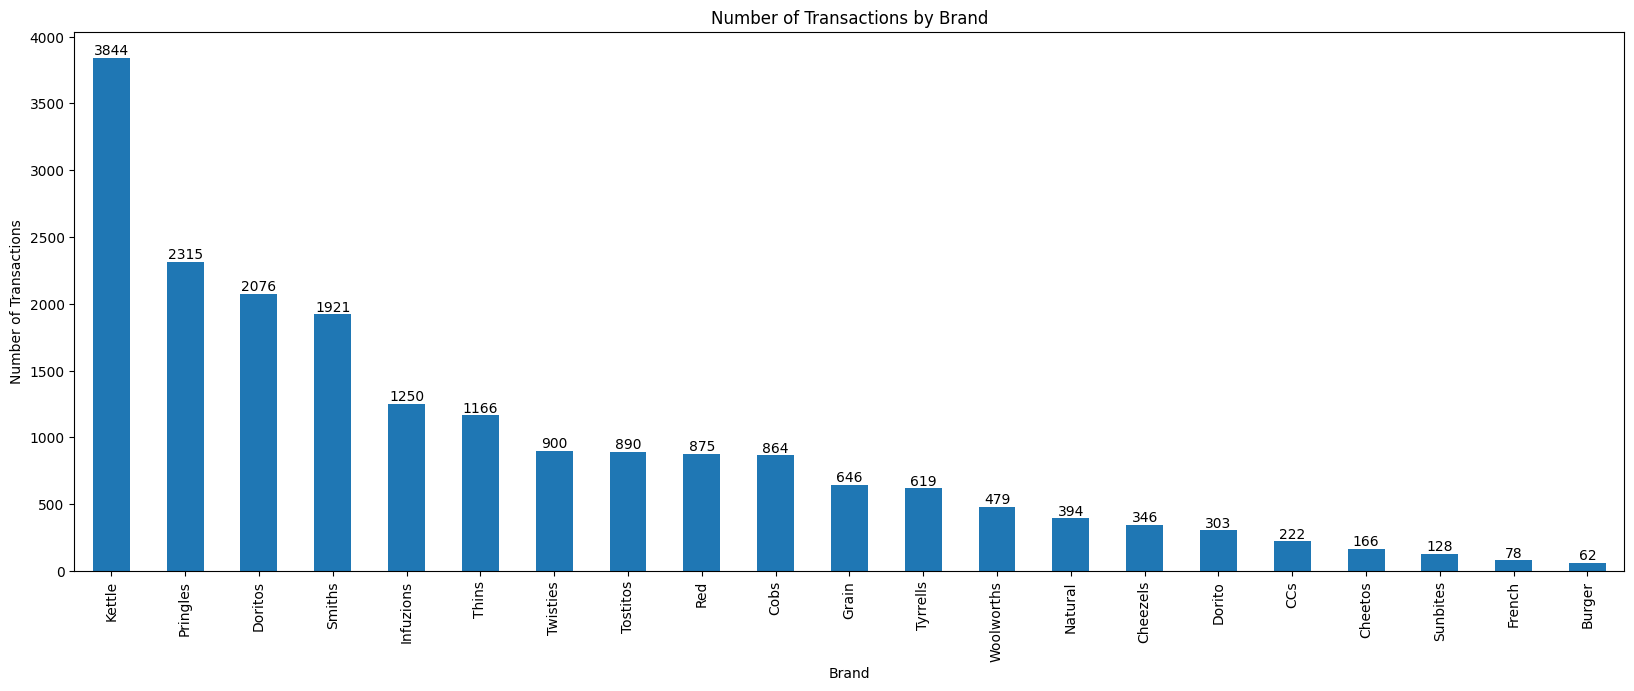

In [50]:
data_MS_YSC.BRAND.value_counts().plot(kind='bar', figsize=(20, 7))
for i in range(len(data_MS_YSC.BRAND.value_counts())):
    plt.text(i, data_MS_YSC.BRAND.value_counts()[i], data_MS_YSC.BRAND.value_counts()[i], ha='center', va='bottom')
plt.xlabel('Brand')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Brand')
plt.show()

We can see that Kettle is the favourite brand, significantly higher than other brands.

<Axes: xlabel='PROD_NAME'>

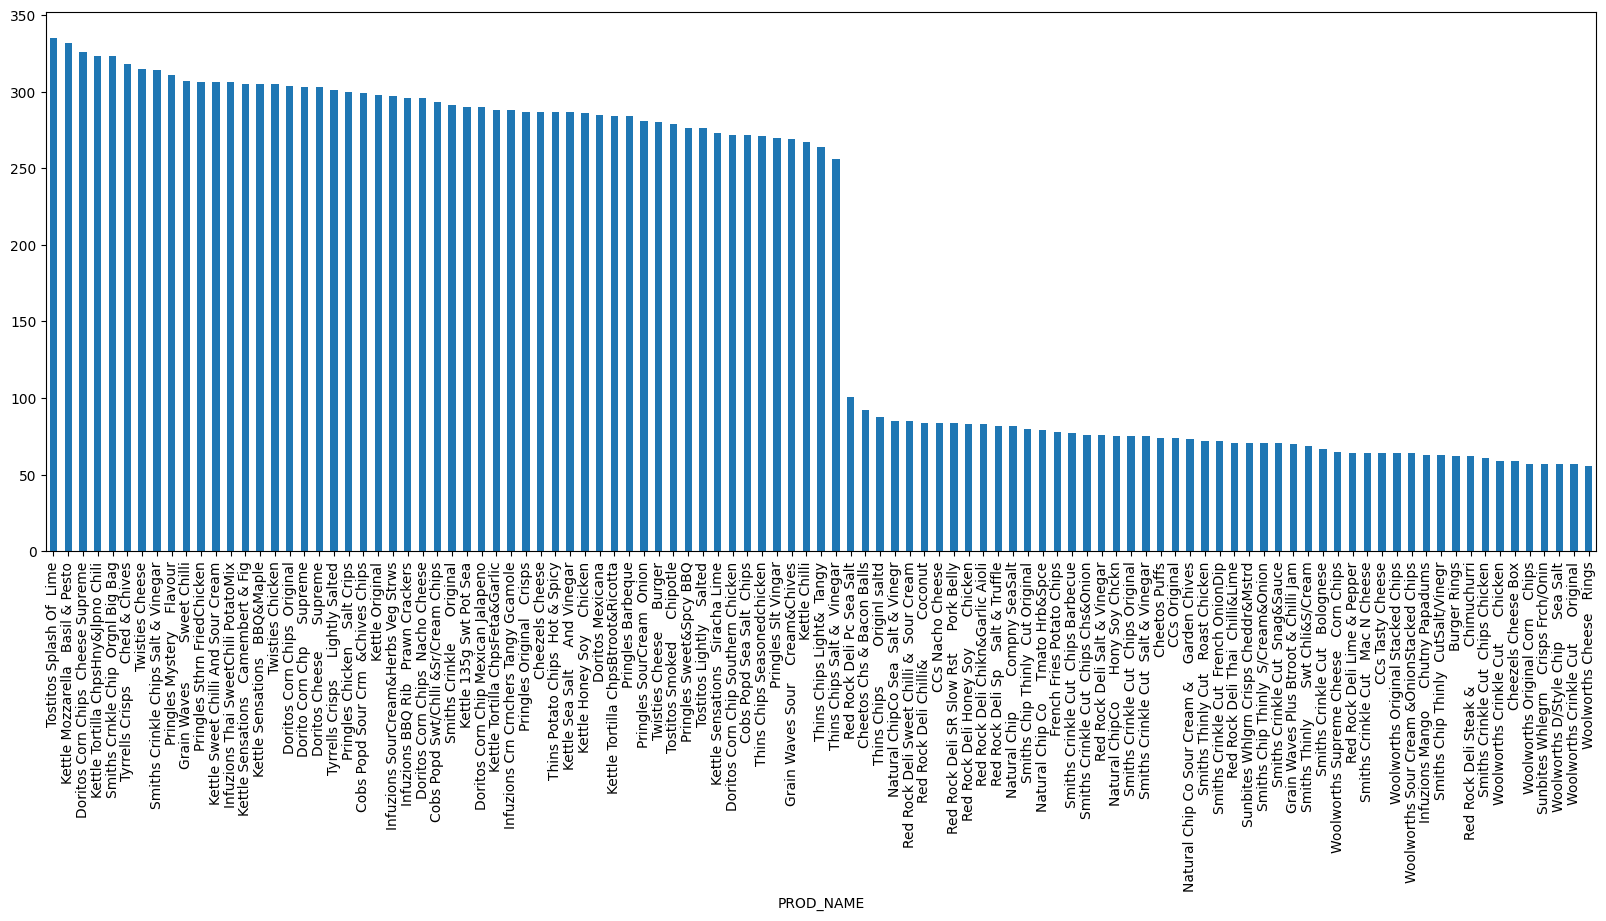

In [51]:
data_MS_YSC.PROD_NAME.value_counts().plot(kind='bar', figsize=(20, 7))

Looking at each product, there is a clear seperation of number of transactions between two sets of products

In [52]:
# all products that have over 250 transactions and its brand
data_MS_YSC[
    data_MS_YSC.PROD_NAME.isin(
        data_MS_YSC.PROD_NAME.value_counts()[data_MS_YSC.PROD_NAME.value_counts() > 250].index
)].BRAND.value_counts()

BRAND
Kettle       3844
Pringles     2315
Doritos      2076
Infuzions    1187
Thins        1078
Smiths        928
Twisties      900
Tostitos      890
Cobs          864
Tyrrells      619
Grain         576
Dorito        303
Cheezels      287
Name: count, dtype: int64

In [53]:
data_MS_YSC['PACK_SIZE'].value_counts()

PACK_SIZE
175    4997
150    3080
134    2315
110    2051
170    1575
330    1195
165    1102
380     626
270     620
210     576
135     290
250     280
200     179
190     148
90      128
160     128
180      70
70       63
220      62
125      59
Name: count, dtype: int64

Prefered packsize is 175g, 150g, 134g, 110g, or 170g.